In [1]:
print('动量法优化')

动量法优化


In [2]:
# 自定义动量法
def sgd_momentum(parameters, vs, lr, gamma):
    for param, v in zip(parameters, vs):
        v[:] = gamma * v + lr * param.grad.data
        param.data = param.data - v


In [3]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch import nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def data_tf(x):
    x = np.array(x, dtype='float32')/255
    x = (x-0.5)/0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x


In [5]:
train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True)
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)
criterion = nn.CrossEntropyLoss()

In [6]:

train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

vs = []
for param in net.parameters():
    vs.append(torch.zeros_like(param.data))

losses = []
start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        sgd_momentum(net.parameters(), vs, 1e-2, 0.9)
        train_loss += loss.item()
        losses.append(loss.item())
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()

print('使用时间: {:.5f} s'.format(end - start))



epoch: 0, Train Loss: 0.364403
epoch: 1, Train Loss: 0.175132
epoch: 2, Train Loss: 0.127089
epoch: 3, Train Loss: 0.101931
epoch: 4, Train Loss: 0.084907
使用时间: 35.37094 s


epoch: 0, Train Loss: 0.366316
epoch: 1, Train Loss: 0.172328
epoch: 2, Train Loss: 0.124804
epoch: 3, Train Loss: 0.097267
epoch: 4, Train Loss: 0.082750
使用时间: 34.00383 s


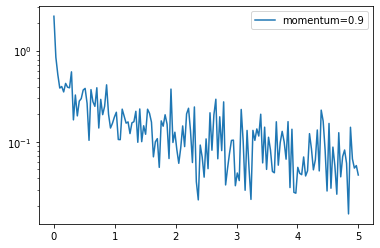

In [13]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)
losses = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if idx % 30 == 0:
            losses.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()

print('使用时间: {:.5f} s'.format(end - start))

x_axis = np.linspace(0,5,len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum=0.9')
plt.legend(loc='best')



epoch: 0, Train Loss: 0.746068
epoch: 1, Train Loss: 0.366645
epoch: 2, Train Loss: 0.321523
epoch: 3, Train Loss: 0.295378
epoch: 4, Train Loss: 0.274370
使用时间: 32.29883 s


ValueError: x and y must have same first dimension, but have shapes (156,) and (157,)

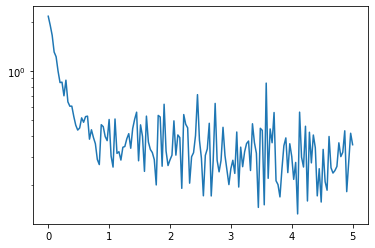

In [14]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0)
losses0 = []
idx
start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if idx % 30 == 0:
            losses0.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()

print('使用时间: {:.5f} s'.format(end - start))

x_axis0 = np.linspace(0,5,len(losses0), endpoint=True)
x_axis = np.linspace(0,5,len(losses), endpoint=True)
plt.semilogy(x_axis0, losses0, label='momentum=0.0')
plt.semilogy(x_axis, losses, label='momentum=0.9')
plt.legend(loc='best')


